In [31]:
import pandas as pd
import numpy as np
import requests
import json
import urllib
from corenlp_xml.document import Document
import string

path="corenlp_plot_summaries/"
with open(path+'330.xml', 'r') as file:
    # print((''.join(file.readlines()[2:])))
    print(file.readlines()[0][0])
    doc=''.join(file.readlines()[0:])
    doc
    d = Document(doc)
    # sentences = d.sentences
    
    # word_to_pos = dict([(token.word, token.pos) for token in sentences[0].tokens])
    # word_to_pos

# get xml file and parse it

# test=pd.read(path+"330.xml")
# test

<


In [186]:
page='The_Godfather'
url=f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page}/monthly/20211001/20221030'
resp = urllib.request.urlopen(url)    
resp_bytes = resp.read()
data = json.loads(resp_bytes)
for month in data['items'] :

    print(month['views'])



206988
229867
206123
259012
251672
424809
310496
551419
498340
505547
383951
343567


In [33]:
from lxml import etree
from io import StringIO, BytesIO


In [184]:
file=open(path+'330.xml','r')
parser = etree.XMLParser(encoding='UTF-8')
tree= etree.parse(file,parser)
root=tree.getroot()
# print(etree.tostring(root, pretty_print=True))
for  child in root[0]:
    print(child.tag)
    for child1 in child:
        print(etree.tostring(child1))

IndentationError: expected an indented block (1218196450.py, line 9)

In [143]:
# sort by country
import json
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
# movies=movies['countries'].apply(lambda row: len((eval(row).values())))
movies=movies['countries'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['countries'])
# movies['countries'].apply(len)
# movies.describe()
movies.head()



(81741, 9)


countries
0  (United States of America)
1  (United States of America)
2                    (Norway)
3            (United Kingdom)
4                   (Germany)

In [140]:
81741*1.057474

86438.982234

In [169]:
US=movies['countries'].apply(lambda lis : "United States of America" in lis and len(lis)==1)
US_movies=movies[US]
print(US.sum())

IN=movies['countries'].apply(lambda lis : "India" in lis)
IN_movies=movies[IN]
print(IN.sum())

mult=movies['countries'].apply(lambda lis : len(lis)>1)
sum(mult)

# one list with all the countries of all the movies
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('test.csv')

# tries=count.index.to_series(index=None, name=None)

# for i in range(147):
#     print(tries.iloc[i],count.iloc[i])

# import sys
# original_stdout = sys.stdout # Save a reference to the original standard output

# with open('filename.txt', 'w') as f:
#     sys.stdout = f # Change the standard output to the file we created.
#     print(exploded['countries'].value_counts())
#     sys.stdout = original_stdout # Reset the standard output to its original value


30300
8411


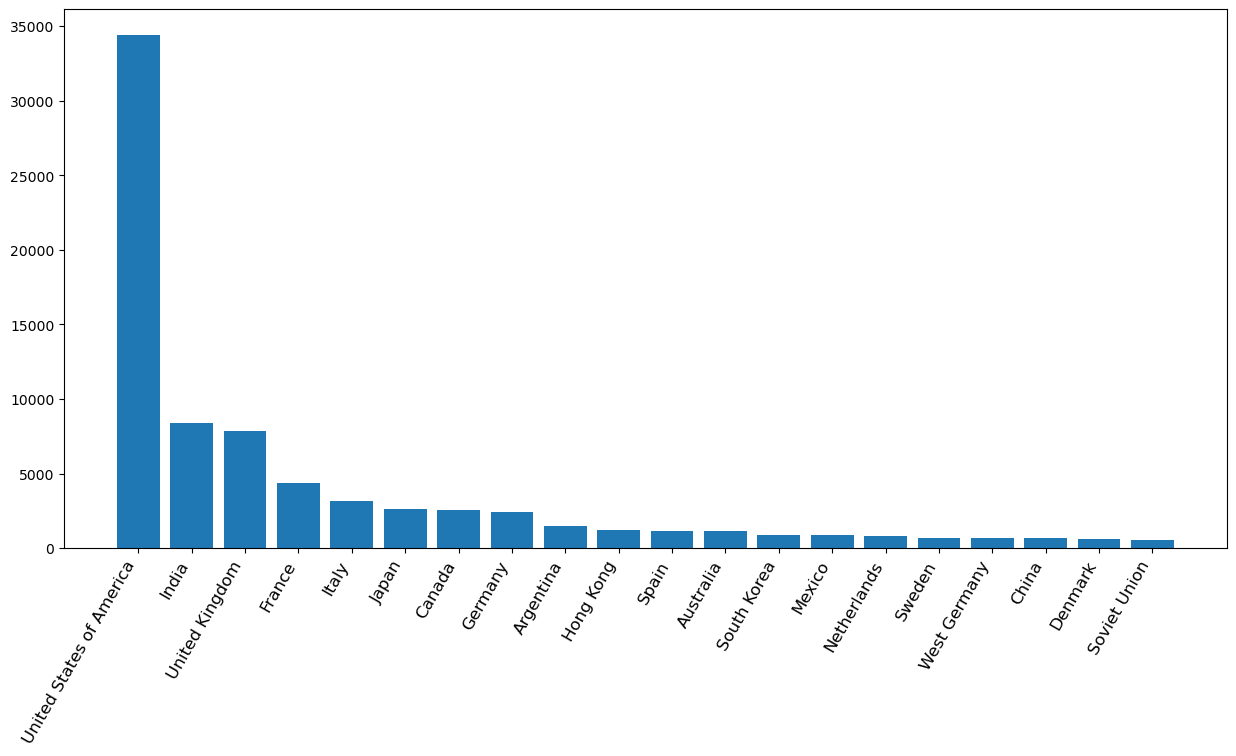

In [182]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count.head(20).index.to_series(),count.head(20))
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);

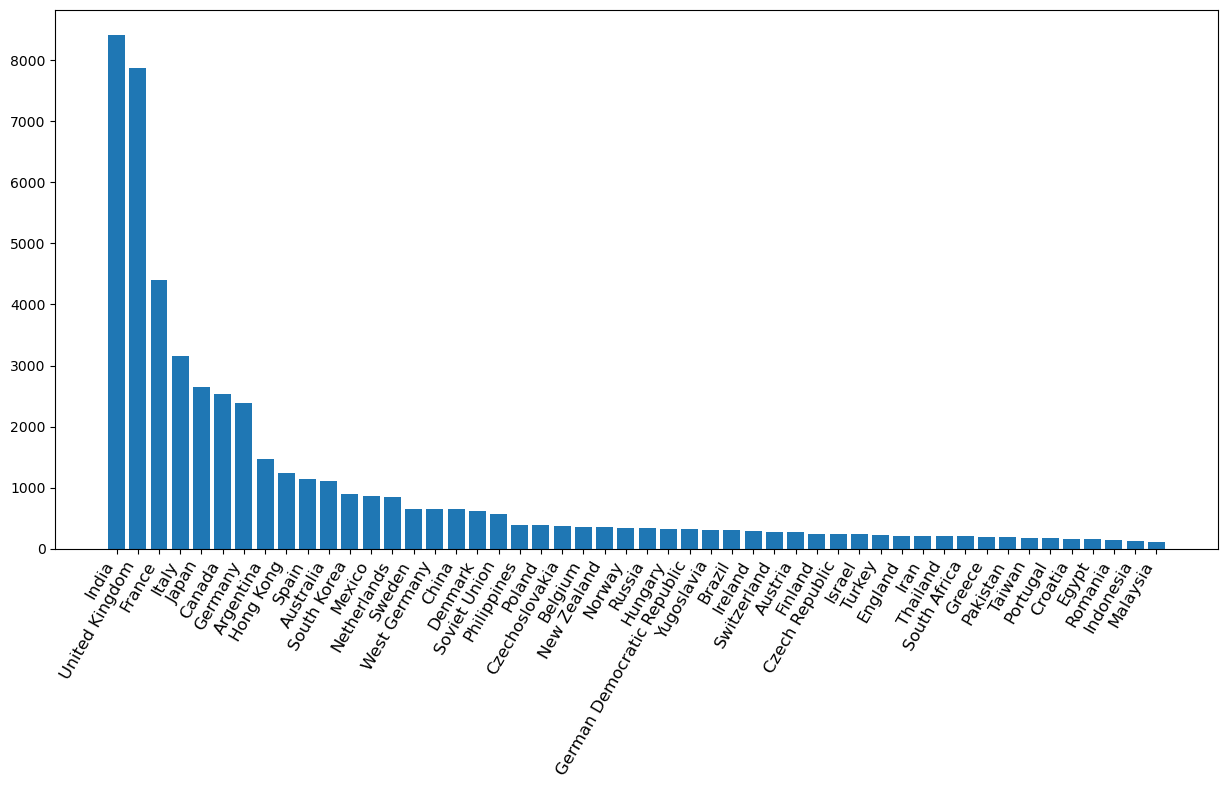

In [183]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count[1:51].index.to_series(),count[1:51])
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);